# Online Sales Data: One Hot Encode, PCA, Plot

**Mr Fugu Data Science**

# (◕‿◕✿)

[Github](https://github.com/MrFuguDataScience)
[Youtube](https://www.youtube.com/channel/UCbni-TDI-Ub8VlGaP8HLTNw?view_as=subscriber)

# Purpose:

+ Create Custom One Hot Encode
    + Create New DF Column from Range Values (Nested If-Else)
+ Transform data to use PCA and K-Modes
+ Plot: PCA's and Scree Plot

In [1]:
# update.packages(ask=F)
library(klaR) # For K-Modes Clustering

library(Matrix)
library(cluster)

Loading required package: MASS



In [2]:
library(rmarkdown)
library(knitr)
# library(tidyr)
library(tidyverse)
library(quanteda) # NLP Processing

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::select() masks MASS::select()
✖ tidyr::unpack() masks Matrix::unpack()

Package version: 2.0.1

Parallel computing: 2 of 4 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




In [3]:
onlineretail<-read.csv("online_sales.csv")

In [4]:
head(onlineretail)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [5]:
# Removing Duplicate Rows: 
online_retail_am <- onlineretail %>% distinct()
head(online_retail_am)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [6]:
# remove_na

remove_na<-na.omit(online_retail_am)
head(remove_na)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [7]:
# Canceled Orders:
sort_countries<-remove_na[order(remove_na$Country,remove_na$Description),]

canceled_orders<-sort_countries[grep("C",sort_countries$InvoiceNo),]

head(canceled_orders)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
267920,C560540,22150,3 STRIPEY MICE FELTCRAFT,-1,7/19/2011 12:26,1.95,12415,Australia
267931,C560540,20979,36 PENCILS TUBE RED RETROSPOT,-1,7/19/2011 12:26,1.25,12415,Australia
267922,C560540,22138,BAKING SET 9 PIECE RETROSPOT,-1,7/19/2011 12:26,4.95,12415,Australia
267906,C560540,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,-1,7/19/2011 12:26,1.65,12415,Australia
267907,C560540,23190,BUNDLE OF 3 SCHOOL EXERCISE BOOKS,-1,7/19/2011 12:26,1.65,12415,Australia
267915,C560540,22973,CHILDREN'S CIRCUS PARADE MUG,-1,7/19/2011 12:26,1.65,12415,Australia


In [8]:
# Using If/Else Conditions: here we are convert a qty of >1 to 1, else 0.
sort_countries$CanceledQty <- ifelse(sort_countries$Quantity>=1, 1, 0)
head(sort_countries)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>
302520,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1
362626,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1
226306,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1
89387,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1
131085,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1
226294,556917,20984,12 PENCILS TALL TUBE POSY,240,6/15/2011 13:37,0.29,12415,Australia,1


In [9]:
# Enabling Now to match rows and remove: this is because a canceled order usually
# has a corresponding value, unless it occured before dataset date range

canceled_orders$Quantity<-abs(canceled_orders$Quantity)
sort_countries$Quantity<-abs(sort_countries$Quantity)
# head(sort_countries)

In [10]:
fun<-sort_countries %>% 
  left_join(select(canceled_orders, CustomerID, StockCode, Quantity, Matches=Country)) %>% 
  mutate(Matches=ifelse(is.na(Matches), FALSE, TRUE))

Joining, by = c("StockCode", "Quantity", "CustomerID")



In [11]:
mm<-fun[!duplicated(fun),]

Order_Canceled<-mm[mm$Matches=='TRUE',] # corresponds to orginal match to canceled

Rest_ofData<-mm[mm$Matches=='FALSE',] # Orders that were never canceled

In [12]:
# Convert text to Lower Case:

tail(lapply(Rest_ofData$Description,tolower))

prod_descr_lower<-lapply(Rest_ofData$Description,tolower)


[[1]]
[1] "set/10 pink polkadot party candles"

[[2]]
[1] "set/10 red polkadot party candles"

[[3]]
[1] "tea time des tea cosy"

[[4]]
[1] "tea time tea set in gift box"

[[5]]
[1] "tea time teapot in gift box"

[[6]]
[1] "vintage red teatime mug"

# Tokens: split sentence into words
+ By default, only removes whitespace, but can be used to remove punctuation as well as numbers.

`ex.) tokens(YOUR_TEXT_HERE, remove_punct = TRUE)`

In [41]:
# Convert to string:
z<-toString(prod_descr_lower)
# head(z)

In [14]:
#Create a Token, remove:(punctuation,symbols,numbers)
remove_punct<-tokens(z,remove_punct = TRUE,
                     remove_symbols = TRUE,remove_numbers =TRUE)


In [15]:
# Remove Stop Words:

stop_words_removed<-tokens_remove(remove_punct,pattern=stopwords('en'))

tail(tokens_remove(remove_punct,pattern=stopwords('en')))

Tokens consisting of 1 document.
text1 :
 [1] "dolly"    "girl"     "beaker"   "love"     "london"   "mini"    
 [7] "backpack" "colour"   "spaceboy" "pen"      "pencil"   "small"   
[ ... and 1,556,918 more ]


In [16]:
# Remove colors, because they are not relevant here since we only want to check common
# description words and get an idea of what comes up the most and has some meaning

toks_nostop <- tokens_remove(stop_words_removed,
                             c('red','white','blue','pink','orange','colour'))

toks_nostop

Tokens consisting of 1 document.
text1 :
 [1] "dolly"    "girl"     "beaker"   "love"     "london"   "mini"    
 [7] "backpack" "spaceboy" "pen"      "pencil"   "small"    "tube"    
[ ... and 1,470,364 more ]


In [17]:
ntoken(toks_nostop)

# length(unique(as.character(toks_nostop)))


text1 
1470376

# Only Keep words of length > 3

 + With these two improvements we go from `2001 to 1930 unique words`.
 + We can further process and use stemming, allowing us to take words such as toy, toy's,
   and make it just toy and then do unique again.



In [18]:
sort(unique(as.character(toks_nostop)))

[1] "-paper"             "120cm"              "125g"              
   [4] "15c"                "15cm"               "16x16cm"           
   [7] "18pc"               "20light"            "250g"              
  [10] "25w"                "25x24x12cm"         "3.5g"              
  [13] "30cm"               "30cmx30cm"          "34x20cm"           
  [16] "3d"                 "40cm"               "40x40cm"           
  [19] "45cm"               "45x30cm"            "45x45cm"           
  [22] "500g"               "50cm"               "60cm"              
  [25] "60x40cm"            "65cmx65cm"          "6pc"               
  [28] "a4"                 "a5"                 "a6"                
  [31] "a7"                 "abc"                "abstract"          
  [34] "acapulco"           "account"            "acrylic"           
  [37] "address"            "ade"                "adult"             
  [40] "advent"             "afghan"             "aged"              
  [43] "ahoy"               "aid"                "air"               
  [46] "airline"            "airmail"            "alarm"             
  [49] "album"              "allium"             "alphabet"          
  [52] "alpine"             "aluminium"          "amber"             
  [55] "amelie"             "amethyst"           "anemone"           
  [58] "angel"              "angels"             "animal"            
  [61] "animals"            "ant"                "antique"           
  [64] "antoienett"         "antoinette"         "aperitif"          
  [67] "apothecary"         "apple"              "apples"            
  [70] "apron"              "aqua"               "area"              
  [73] "army"               "art"                "articulated"       
  [76] "artificial"         "artiifcial"         "ashtray"           
  [79] "ass"                "assorted"           "asst"              
  [82] "asstd"              "b"                  "b'draw"            
  [85] "b'fly"              "babushka"           "baby"              
  [88] "back"               "backpack"           "bad"               
  [91] "badges"             "bag"                "bags"              
  [94] "bain"               "bake"               "bakelike"          
  [97] "baker"              "baking"             "ball"              
 [100] "balloon"            "balloons"           "balls"             
 [103] "balm"               "bamboo"             "band"              
 [106] "bangle"             "bank"               "banner"            
 [109] "banquet"            "bar"                "barn"              
 [112] "baroque"            "baroquecandlestick" "barrel"            
 [115] "barrier"            "base"               "baseball"          
 [118] "basil"              "basin"              "basket"            
 [121] "baskets"            "bath"               "bathroom"          
 [124] "baths"              "battery"            "bauble"            
 [127] "baubles"            "bazaar"             "bea"               
 [130] "beach"              "bead"               "beaded"            
 [133] "beads"              "beak"               "beaker"            
 [136] "beakers"            "bear"               "beaten"            
 [139] "beautiful"          "beauty"             "bed"               
 [142] "bedroom"            "bedside"            "bee"               
 [145] "beetles"            "bell"               "belle"             
 [148] "bells"              "bendy"              "berries"           
 [151] "bertie"             "best"               "beurre"            
 [154] "beware"             "bib"                "bicycle"           
 [157] "big"                "bili"               "bill"              
 [160] "billboard"          "bin"                "bingo"             
 [163] "bird"               "birdcage"           "birdhouse"         
 [166] "birds"              "birdy"              "birthday"          
 [169] "biscuit"            "biscuits"           "bitty"             
 [172] "black

In [19]:
# Remove strings with Digits, that aren't captured by Tokenizer
remove_digits<-tokens_remove(toks_nostop, pattern = "(?<=\\d{1,5})\\w+", 
                             valuetype = "regex" )


In [20]:
# Create unique tokens of  at least 3 chars:

min_threeChar <- unique(as.character(tokens_select(remove_digits,min_nchar = 3)))
length(min_threeChar)

[1] 1930

# This Next Line Is `SLOW`: `One Hot Encoding`

+ You are doing a large amount of comparisons, the list of words:
There are (2001) words in the Text list and 3890 unique rows which account for ~10% of the entire rows.

+ There are 387255 rows in the DF, you cannot drop these unless you have good reason for your analysis. Since, I will be using Column counts it is essential. 

In [22]:
# Find a [Substring] , compare list of string verse Data frame column of strings:

text<-prod_descr_lower

# text<-unique(as.character(toks_nostop))
findSubString<-sapply(min_threeChar, function(x) grepl(sprintf('\\b%s\\b', x), text))


In [23]:
# as.integer(as.logical(mmm$))
xxx<-data.frame(findSubString)
head(xxx)


,dolly,girl,beaker,love,london,mini,backpack,spaceboy,pen,pencil,⋯,ream,crystals,lt.blue,wise,woven,berries,bubble,gum,frost,russian
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [278]:
# length(prod_descr_lower)

In [24]:
# CONVERT TRUE/FAlSE to 1/0:
# sapply: take (list,DF,vector) -> returns (matrix or vector), lapply: input fcn -> vector
# is.logical: T/F values

cols <- sapply(xxx, is.logical)
xxx[,cols] <- lapply(xxx[,cols], as.numeric)

In [42]:
xxx<-data.frame(xxx)
# tail(unique(xxx))

xxx_<-data.frame(cbind(xxx,Rest_ofData$UnitPrice))

# head(xxx_)

,dolly,girl,beaker,love,london,mini,backpack,spaceboy,pen,pencil,⋯,crystals,lt.blue,wise,woven,berries,bubble,gum,frost,russian,Rest_ofData.UnitPrice
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1.08
2,0,0,0,1,1,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4.15
3,0,0,0,0,0,0,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0.85
4,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0.55
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0.85
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0.29


In [26]:
dist<-distinct(xxx_)
head(dist)

In [ ]:
write.csv(dist,'encoded_labelsCustomerSales.csv')

In [27]:
bnm<-read.csv('encoded_labelsCustomerSales.csv')

# Matrix(data.matrix(bnm),sparse=TRUE)

In [28]:
# Mention How a Sparse Matrix Effects file size:

object.size(Matrix(data.matrix(bnm),sparse=TRUE))

object.size(bnm)

711096 bytes

64056224 bytes

In [215]:
# tail(xxx_)

# subset(dist, dist$Rest_ofData.UnitPrice<1)

# bnm$price_range <- ifelse(bnm$Rest_ofData.UnitPrice <1,
# 'LessThanDollar',ifelse(bnm$Rest_ofData.UnitPrice >=1 & bnm$Rest_ofData.UnitPrice <=3,'OnetoThree',
# ifelse(bnm$Rest_ofData.UnitPrice >3 & bnm$Rest_ofData.UnitPrice <=5,'ThreetoFive',
# ifelse(bnm$Rest_ofData.UnitPrice >5 & bnm$Rest_ofData.UnitPrice <=10, 'FivetoTen','OverTen'))))
# # head(dist)
# head(bnm)

In [29]:
drops <- c('Rest_ofData.UnitPrice')
moved<-bnm[ , !(names(bnm) %in% drops)]


head(moved)

,X,dolly,girl,beaker,love,london,mini,backpack,spaceboy,pen,⋯,ream,crystals,lt.blue,wise,woven,berries,bubble,gum,frost,russian
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [45]:
# Rest_ofData$Wowx<-ifelse(Rest_ofData$UnitPrice <1,
# 'LessThanDollar','O')
# Rest_ofData

In [30]:
Rest_ofData$price_range <- ifelse(Rest_ofData$UnitPrice <1,
'LessThanDollar',ifelse(Rest_ofData$UnitPrice >=1 & Rest_ofData$UnitPrice <=3,'OnetoThree',
ifelse(Rest_ofData$UnitPrice >3 & Rest_ofData$UnitPrice <=5,'ThreetoFive',
ifelse(Rest_ofData$UnitPrice>5 & Rest_ofData$UnitPrice <=10, 'FivetoTen','OverTen'))))
# head(dist)
head(Rest_ofData)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches,price_range
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<chr>
1,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1,FALSE,OnetoThree
2,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1,FALSE,ThreetoFive
3,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1,FALSE,LessThanDollar
4,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1,FALSE,LessThanDollar
5,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1,FALSE,LessThanDollar
6,556917,20984,12 PENCILS TALL TUBE POSY,240,6/15/2011 13:37,0.29,12415,Australia,1,FALSE,LessThanDollar


In [47]:


Rest_ofData_subset<-select(Rest_ofData, price_range,Description,Quantity)

Descr_rows<-reshape(Rest_ofData_subset,timevar = "price_range",
        times ="Rest_ofData_subset$price_range",
        direction="wide",idvar = "Description")

Descr_rows[is.na(Descr_rows)]<-0



Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for price_range=OnetoThree: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for price_range=ThreetoFive: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for price_range=LessThanDollar: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for price_range=OverTen: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for price_range=FivetoTen: first taken”


In [59]:
# Descr_rows(-c(1))
pCA_<-prcomp(Descr_rows[-c(1)],scale. = T)

In [ ]:
# pCA_$

In [51]:
KModes<-kmodes(Descr_rows[-c(1)], 7, iter.max = 8, weighted = FALSE )


Warning message in kmodes(Descr_rows[-c(1)], 7, iter.max = 8, weighted = FALSE):
“data has numeric coloumns with more than 30 different levels!”


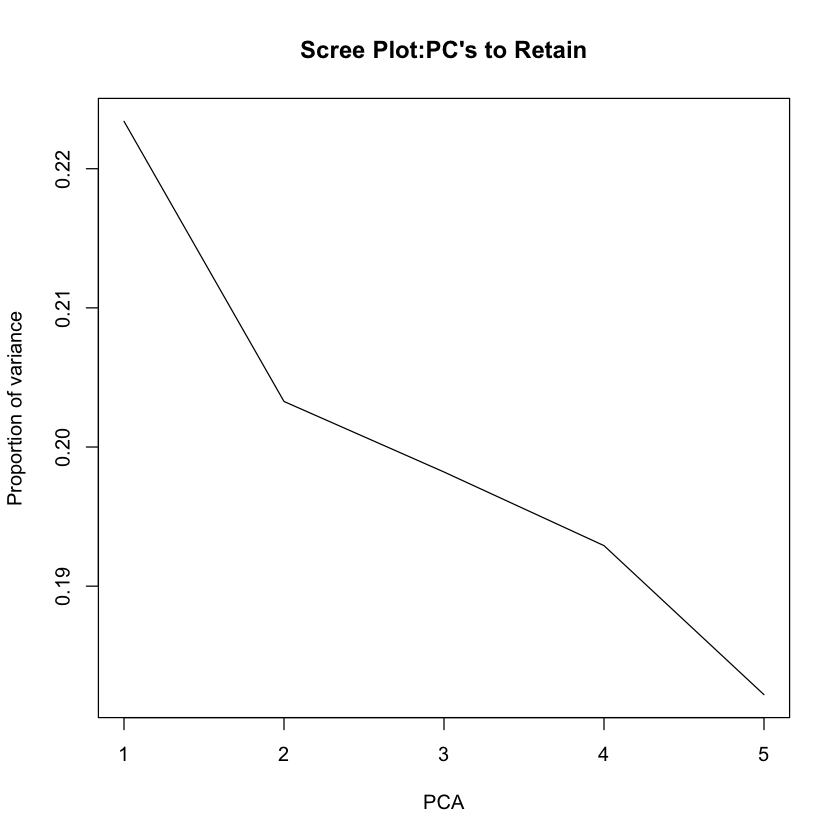

In [60]:
plot(pCA_$sdev^2/sum(pCA_$sdev^2),type="l",main="Scree Plot:PC's to Retain",ylab="Proportion of variance",xlab="PCA")

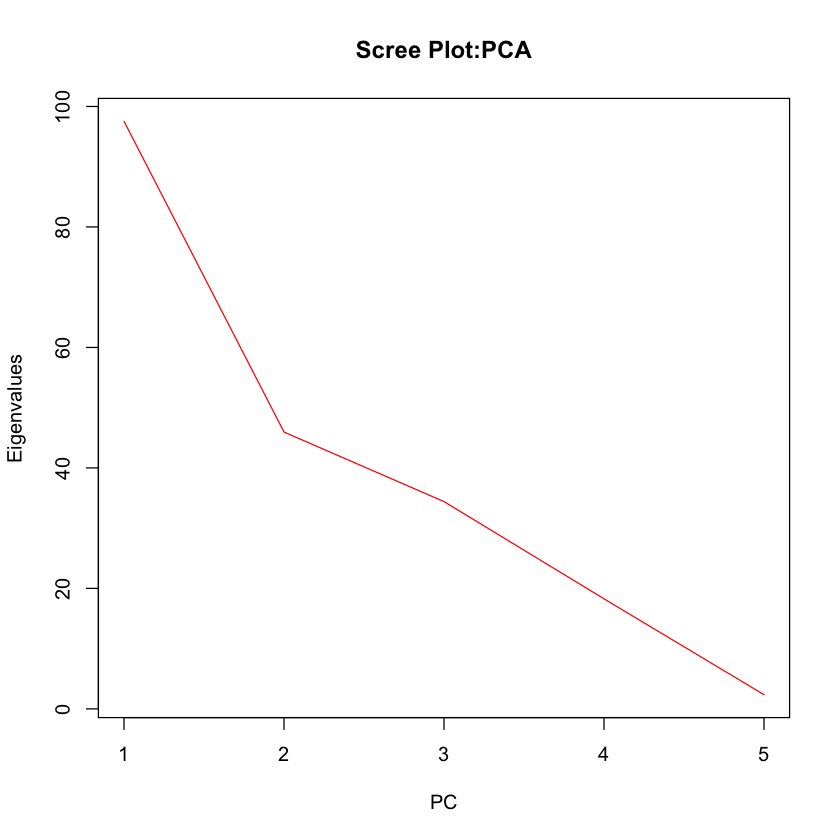

In [53]:
plot(pCA_$sdev,type="l",ylab="Eigenvalues",main="Scree Plot:PCA",xlab="PC",col="red")

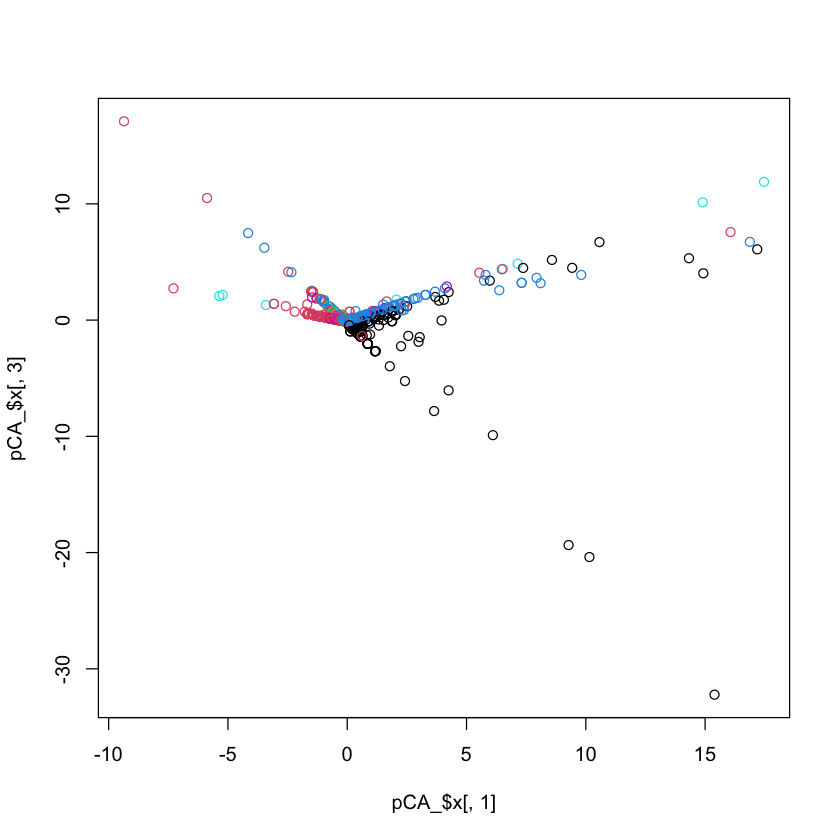

In [61]:
plot(pCA_$x[,1],pCA_$x[,3],col=KModes$cluster)

In [62]:
# Percent of Explained Variance:

apply(pCA_$x, 2, var)/sum(apply(pCA_$x, 2, var))
# pCA_$x

PC1       PC2       PC3       PC4       PC5 
0.2234058 0.2032738 0.1982053 0.1929130 0.1822022

# Create `Words Clouds` to see what is in common:
(**From the 5 clusters**)

In [3]:
zz<-colSums(xxx)

ERROR: Error in is.data.frame(x): object 'xxx' not found


In [ ]:
(t(zz))

In [231]:
# colSums(Descr_rows[-c(1)])

In [2]:
zz

ERROR: Error in eval(expr, envir, enclos): object 'zz' not found


In [1]:
# silhouette(KModes$cluster,dist = Descr_rows[-c(1)])

ERROR: Error in silhouette(KModes$cluster, dist = Descr_rows[-c(1)]): could not find function "silhouette"


# Citations & Help:

# ◔̯◔

https://medium.com/codesmart/r-series-k-means-clustering-silhouette-794774b46586

https://stackoverflow.com/questions/48649443/how-to-one-hot-encode-several-categorical-variables-in-r

https://www.kaggle.com/fabiendaniel/customer-segmentation

https://discuss.analyticsvidhya.com/t/how-to-do-one-hot-encoding-in-r/6982/3

https://stackoverflow.com/questions/14682115/how-to-compare-each-element-of-a-string-to-a-list-of-words-in-r

https://towardsdatascience.com/market-segmentation-with-r-pca-k-means-clustering-part-1-d2c338b1dd0b

https://towardsdatascience.com/exploratory-data-analysis-on-e-commerce-data-be24c72b32b2

https://archive.ics.uci.edu/ml/datasets/online+retail

https://appsilon.com/customer-segmentation-leads-to-goodies/

https://rstudio-pubs-static.s3.amazonaws.com/370943_cbb1b4f7ad284442843c4120bf7f2c40.html

https://katie.mtech.edu/classes/csci347/Schedule/hm03_ans.pdf

https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

https://www.youtube.com/watch?v=xKl4LJAXnEA

https://www.youtube.com/watch?v=5eDqRysaico

https://stackoverflow.com/questions/24031871/check-for-a-list-of-strings-words-in-a-text-phrase

https://stackoverflow.com/questions/30943167/how-can-i-replace-true-and-false-values-with-1-and-0-when-exporting-data-in-r

https://medium.com/codesmart/r-series-k-means-clustering-silhouette-794774b46586

https://dabblingwithdata.wordpress.com/2016/10/10/clustering-categorical-data-with-r/

https://stackoverflow.com/questions/37321020/adding-new-column-with-conditional-values-using-ifelse

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

http://www.johnmyleswhite.com/notebook/2011/10/31/using-sparse-matrices-in-r/

https://ro-che.info/articles/2017-12-11-pca-explained-variance

https://support.rstudio.com/hc/en-us/articles/218221837-Profiling-with-RStudio

https://www.r-bloggers.com/tracking-progress-in-r/

https://dabblingwithdata.wordpress.com/2016/10/10/clustering-categorical-data-with-r/

https://stackoverflow.com/questions/54785525/silhouette-calculation-in-r-for-a-large-data